# 1. Introduction

Although it has been severely affected by the Covid-19 crisis, Airbnb is by far the largest company in the hospitality industry. They operate in more than 100,000 cities and more than 200 countries worldwide. The company has grown so fast that the number of locations listed on the platform worldwide has exceeded seven million. Since its inception, they have hosted more than 750 million guests. Before the Covid-19 crisis, the average number of overnight stays was more than 2 million. For many of us, Airbnb is the first place we look for accommodation when we travel to a new country or a new city. During the search for accommodation on Airbnb, the factor that most affects our decision is the price. We try to find the most suitable alternative for us according to our own budget. this point, the question that we all seek answers is what factors affect the reservation price on Airbnb the most.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
#read the datasets
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

# 2. Data Exploration

### a) Listings

In [3]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [4]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

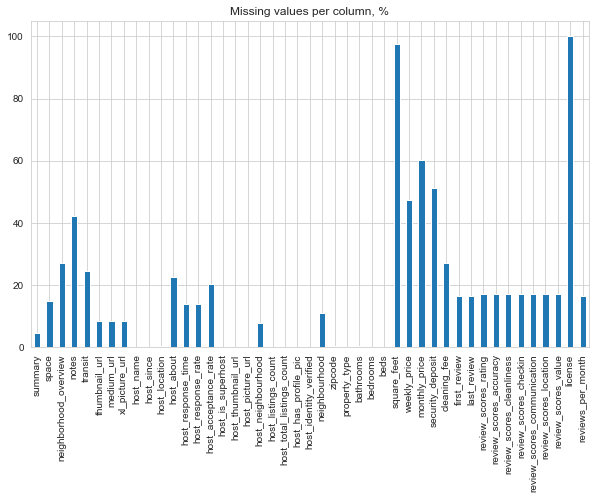

In [6]:
#percentage of missing values for each column
listings_na = listings.isna().mean()*100

#filtered columns with missing values
listings_na = listings_na[listings_na>0]

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
listings_na.plot.bar(title='Missing values per column, %')

In [7]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [8]:
# identify all the categorical variables
listings.select_dtypes(include="object").columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [9]:
# identify all the numerical variables
listings.select_dtypes(include="float64").columns

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'beds', 'square_feet',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

In [10]:
#Function for $ cleaning process
dolarizer = lambda x: float(x.replace('$','').replace(',',''))

#weekly_price column cleaning with dolarizer
listings['price'] = listings.price.astype('str')
listings['price'] = listings.price.apply(dolarizer)

In [11]:
# Check unique IDs column
listings.id.nunique()

3818

All of them are unique. It can be used for join tables.

In [12]:
# Check unique host_ID column
listings.host_id.nunique()

2751

In [13]:
# Check host_response_rate column
listings.host_response_rate

0        96%
1        98%
2        67%
3        NaN
4       100%
        ... 
3813     99%
3814    100%
3815     NaN
3816    100%
3817    100%
Name: host_response_rate, Length: 3818, dtype: object

In [14]:
# Check host_is_superhost column
listings.host_is_superhost.value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [15]:
# Check host_listings_count column
listings.host_listings_count

0         3.0
1         6.0
2         2.0
3         1.0
4         2.0
        ...  
3813    354.0
3814      1.0
3815      1.0
3816      1.0
3817      1.0
Name: host_listings_count, Length: 3818, dtype: float64

In [16]:
# Check property types
listings.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [17]:
# Check room types
listings.room_type.value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [18]:
# Explore bed_type
listings.bed_type.value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [19]:
#Function for % cleaning process
perc = lambda x:x.replace('%','')

#host_acceptance_rate column cleaning with perc
listings['host_acceptance_rate'] = listings.host_acceptance_rate.astype('str')
listings['host_acceptance_rate'] = listings.host_acceptance_rate.apply(perc).astype(float)

#host_response_rate column cleaning with perc
listings['host_response_rate'] = listings.host_response_rate.astype('str')
listings['host_response_rate'] = listings.host_response_rate.apply(perc).astype(float)

In [20]:
drop_columns = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name',
       'host_location', 'host_about',
       'host_thumbnail_url', 'host_picture_url','host_neighbourhood',
       'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood','zipcode',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'accommodates',
       'amenities', 'square_feet',
       'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'first_review', 'last_review',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']

In [21]:
listings.drop(drop_columns,axis=1,inplace=True)

In [22]:
listings.isna().sum()

id                          0
host_id                     0
host_since                  2
host_response_time        523
host_response_rate        523
host_acceptance_rate      773
host_is_superhost           2
host_listings_count         2
neighbourhood_cleansed      0
property_type               1
room_type                   0
bathrooms                  16
bedrooms                    6
beds                        1
bed_type                    0
price                       0
number_of_reviews           0
review_scores_rating      647
cancellation_policy         0
dtype: int64

Text(0.5, 1.0, 'Top 20 Neighbourhood with the Highest Number of Listings')

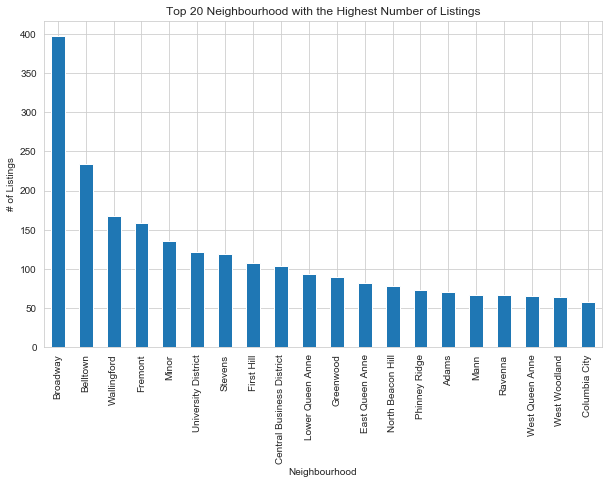

In [23]:
plt.figure(figsize=(10,6))
listings.groupby(by='neighbourhood_cleansed').price.count().sort_values(ascending=False).head(20).plot(kind='bar')

plt.ylabel('# of Listings')
plt.xlabel('Neighbourhood')
plt.title('Top 20 Neighbourhood with the Highest Number of Listings')

Text(0.5, 1.0, 'Listing Price Distribution')

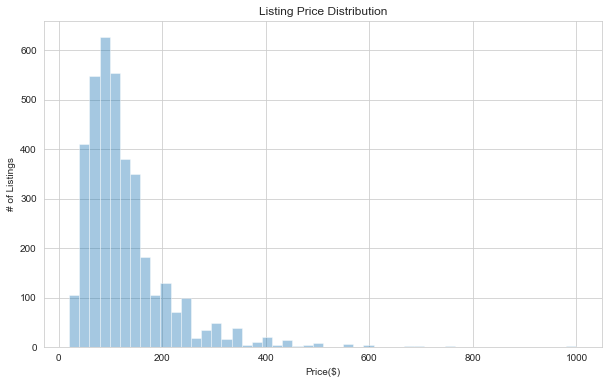

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(listings.price,kde=False,bins=50)

plt.xlabel('Price($)')
plt.ylabel('# of Listings')
plt.title('Listing Price Distribution')

Text(0.5, 1.0, 'Top 10 Neighbourhood with the Highest Price')

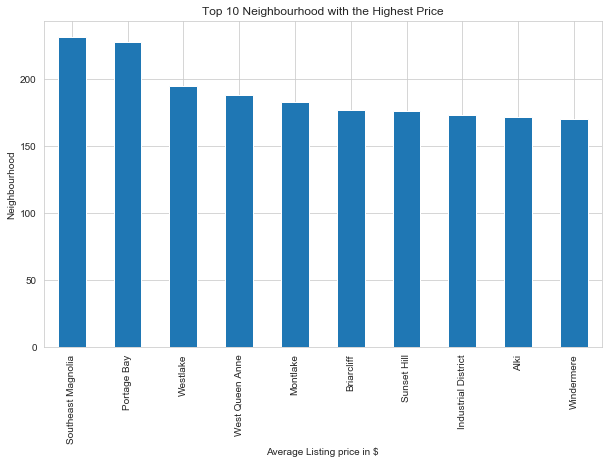

In [25]:
plt.figure(figsize=(10,6))
listings.groupby(by='neighbourhood_cleansed').price.mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Average Listing price in $')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Neighbourhood with the Highest Price')

Text(0.5, 1.0, 'Top 10 Neighbourhood with the Lowest Price')

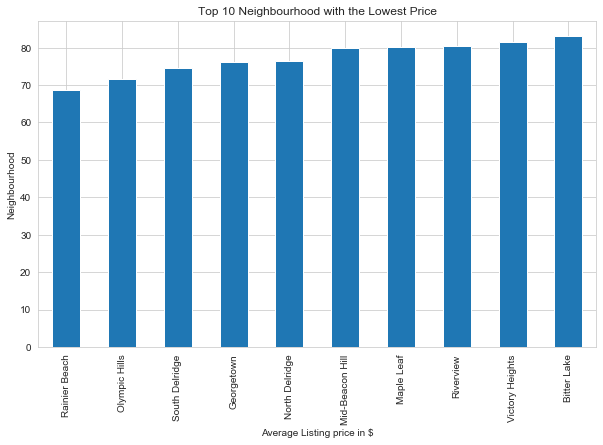

In [26]:
plt.figure(figsize=(10,6))
listings.groupby(by='neighbourhood_cleansed').price.mean().sort_values(ascending=True).head(10).plot(kind='bar')
plt.xlabel('Average Listing price in $')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Neighbourhood with the Lowest Price')

Text(0.5, 1.0, 'Price vs # of Bedrooms')

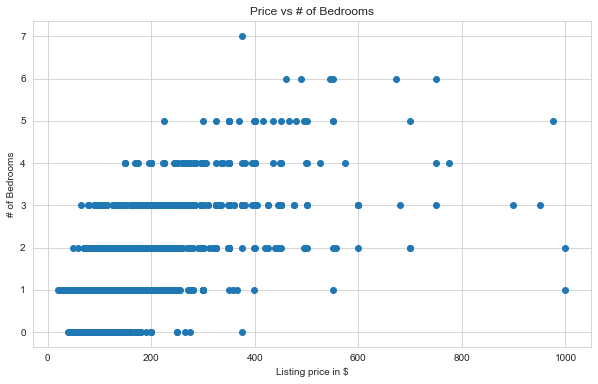

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(listings['price'],listings['bedrooms'])
plt.xlabel('Listing price in $')
plt.ylabel('# of Bedrooms')
plt.title('Price vs # of Bedrooms')

Text(0.5, 1.0, 'Price vs # of Bathrooms')

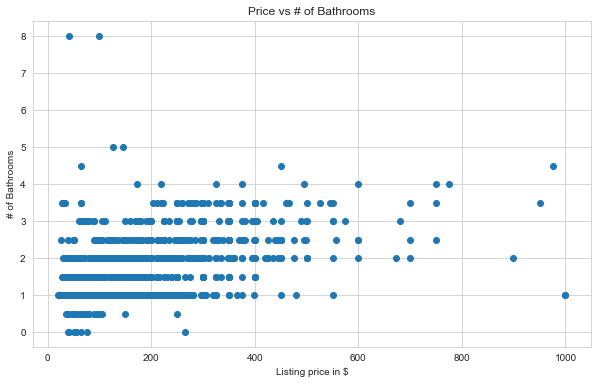

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(listings['price'],listings['bathrooms'])
plt.xlabel('Listing price in $')
plt.ylabel('# of Bathrooms')
plt.title('Price vs # of Bathrooms')

Text(0.5, 1.0, 'Price vs Room Type')

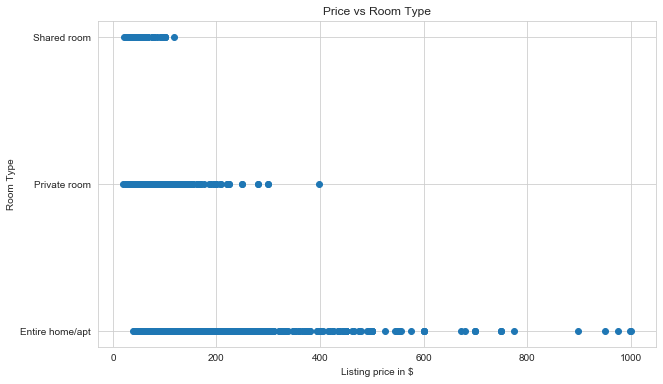

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(listings['price'],listings['room_type'])
plt.xlabel('Listing price in $')
plt.ylabel('Room Type')
plt.title('Price vs Room Type')

Text(0.5, 1.0, 'Price vs # of Beds')

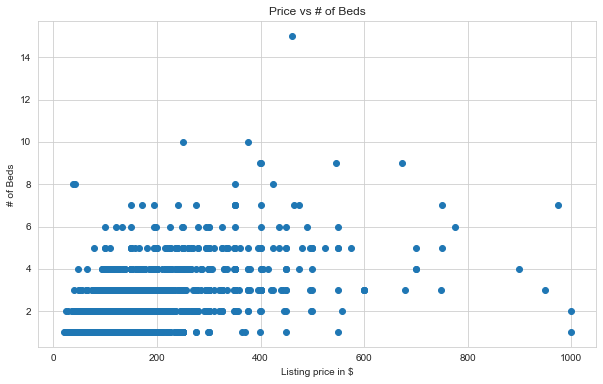

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(listings['price'],listings['beds'])
plt.xlabel('Listing price in $')
plt.ylabel('# of Beds')
plt.title('Price vs # of Beds')

Text(0.5, 1.0, 'Price vs. Bed Type')

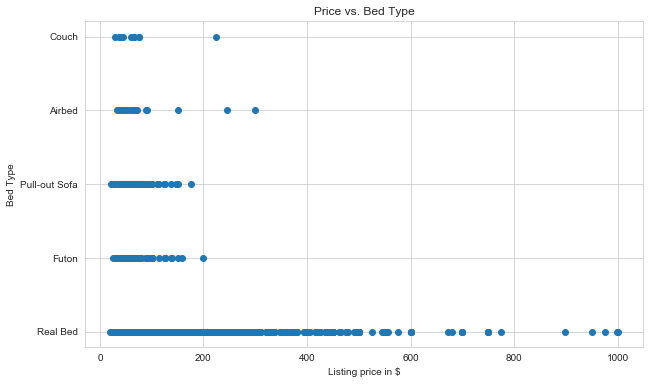

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(listings['price'],listings['bed_type'])
plt.xlabel('Listing price in $')
plt.ylabel('Bed Type')
plt.title('Price vs. Bed Type')

Text(0.5, 1.0, 'Price vs. Number of Reviews')

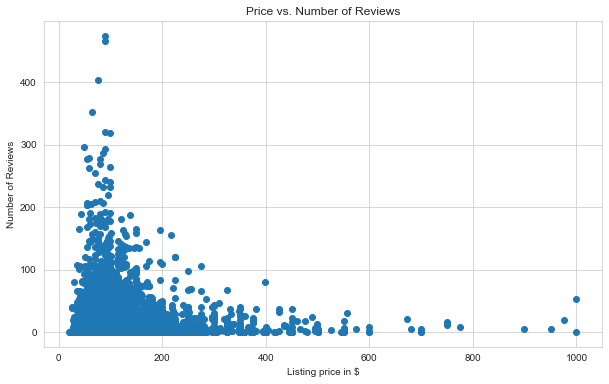

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(listings['price'],listings['number_of_reviews'])
plt.xlabel('Listing price in $')
plt.ylabel('Number of Reviews')
plt.title('Price vs. Number of Reviews')

Text(0.5, 1.0, 'Price vs Number of Reviews')

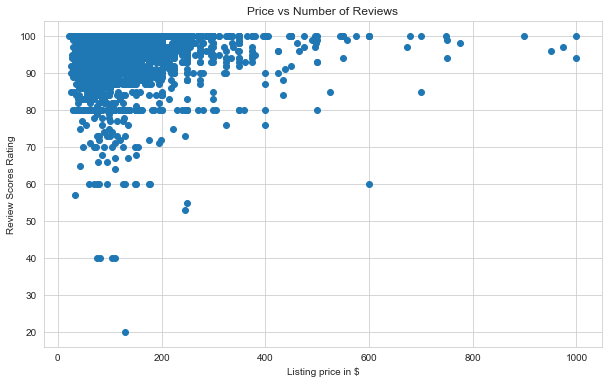

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(listings['price'],listings['review_scores_rating'])
plt.xlabel('Listing price in $')
plt.ylabel('Review Scores Rating')
plt.title('Price vs Number of Reviews')

According to grap, high price does not bring high rating score. Although it is priced as low as $ 100- $ 200, we see that there are many accommodation alternatives with very high scores.

Text(0.5, 1.0, 'Price vs. Cancellation Policy')

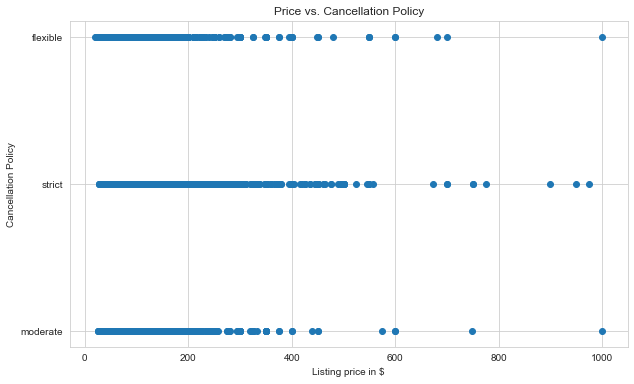

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(listings['price'],listings['cancellation_policy'])
plt.xlabel('Listing price in $')
plt.ylabel('Cancellation Policy')
plt.title('Price vs. Cancellation Policy')

In [35]:
#fig, ax = plt.subplots(figsize=(15,10))
#sns.heatmap(listings.corr(),annot=True);
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

In [36]:
listings.dtypes

id                          int64
host_id                     int64
host_since                 object
host_response_time         object
host_response_rate        float64
host_acceptance_rate      float64
host_is_superhost          object
host_listings_count       float64
neighbourhood_cleansed     object
property_type              object
room_type                  object
bathrooms                 float64
bedrooms                  float64
beds                      float64
bed_type                   object
price                     float64
number_of_reviews           int64
review_scores_rating      float64
cancellation_policy        object
dtype: object

### b) Calendar

In [37]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [38]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [39]:
#Number of missing values for price
calendar.isnull().sum()/len(calendar)*100

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

In [40]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [41]:
calendar['date'] = pd.to_datetime(calendar.date)

In [42]:
#Function for $ cleaning process
dolarizer = lambda x: float(x.replace('$','').replace(',',''))

#weekly_price column cleaning with dolarizer
calendar['price'] = calendar.price.astype('str')
calendar['price'] = calendar.price.apply(dolarizer)

In [43]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [44]:
calendar.dropna(subset=['price'],inplace=True)

In [45]:
#Number of missing values for price
calendar.isnull().sum()/len(calendar)*100

listing_id    0.0
date          0.0
available     0.0
price         0.0
dtype: float64

In [46]:
calendar.shape

(934542, 4)

In [47]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [48]:
sns.set_style()

Text(0.5, 1.0, 'Average Price by Month')

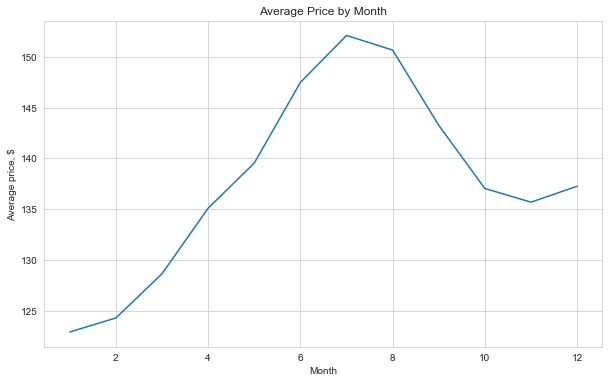

In [49]:
#find average price by month


calendar['Month'] = calendar.date.dt.month
average_price_by_month = calendar.groupby(by ='Month').price.mean()

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot(average_price_by_month)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average Price by Month')

In [50]:
average_price_by_month

Month
1     122.912176
2     124.293927
3     128.644488
4     135.097005
5     139.538183
6     147.473137
7     152.094150
8     150.656594
9     143.255949
10    137.031939
11    135.688738
12    137.251835
Name: price, dtype: float64

During the summer months, accommodation on Airbnb increases. August seems to be the most expensive month in this sense.

### c) Reviews

In [51]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [52]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


# Data Preparation

### a) Join Calendar and Listings Table

In [53]:
list_with_cal = pd.merge(calendar,listings,left_on='listing_id',right_on='id')
list_with_cal.drop(columns=['listing_id','price_y'], inplace=True, axis=1)
list_with_cal.rename(columns={'price_x': 'price'}, inplace=True)

In [54]:
list_with_cal

,date,available,price,Month,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_rating,cancellation_policy
0,2016-01-04,t,85.0,1,241032,956883,2011-08-11,within a few hours,96.0,100.0,f,3.0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,207,95.0,moderate
1,2016-01-05,t,85.0,1,241032,956883,2011-08-11,within a few hours,96.0,100.0,f,3.0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,207,95.0,moderate
2,2016-01-13,t,85.0,1,241032,956883,2011-08-11,within a few hours,96.0,100.0,f,3.0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,207,95.0,moderate
3,2016-01-14,t,85.0,1,241032,956883,2011-08-11,within a few hours,96.0,100.0,f,3.0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,207,95.0,moderate
4,2016-01-18,t,85.0,1,241032,956883,2011-08-11,within a few hours,96.0,100.0,f,3.0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,207,95.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934537,2016-01-06,t,87.0,1,10208623,14703116,2014-04-25,within a day,100.0,NaN,f,1.0,East Queen Anne,Apartment,Entire home/apt,1.5,2.0,1.0,Real Bed,0,NaN,flexible
934538,2016-01-07,t,87.0,1,10208623,14703116,2014-04-25,within a day,100.0,NaN,f,1.0,East Queen Anne,Apartment,Entire home/apt,1.5,2.0,1.0,Real Bed,0,NaN,flexible
934539,2016-01-10,t,87.0,1,10208623,14703116,2014-04-25,within a day,100.0,NaN,f,1.0,East Queen Anne,Apartment,Entire home/apt,1.5,2.0,1.0,Real Bed,0,NaN,flexible
934540,2016-01-11,t,87.0,1,10208623,14703116,2014-04-25,within a day,100.0,NaN,f,1.0,East Queen Anne,Apartment,Entire home/apt,1.5,2.0,1.0,Real Bed,0,NaN,flexible


###  e) Data Visualization

Text(0.5, 1.0, '# of Reviews vs Price($)')

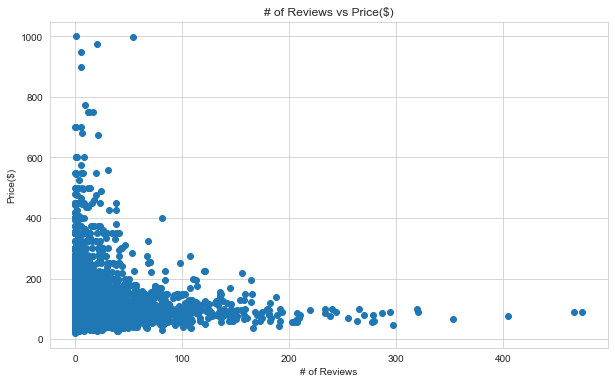

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(listings['number_of_reviews'],listings['price'])
plt.xlabel('# of Reviews')
plt.ylabel('Price($)')
plt.title('# of Reviews vs Price($)')


Text(0.5, 1.0, 'Number of listings per month, 2016')

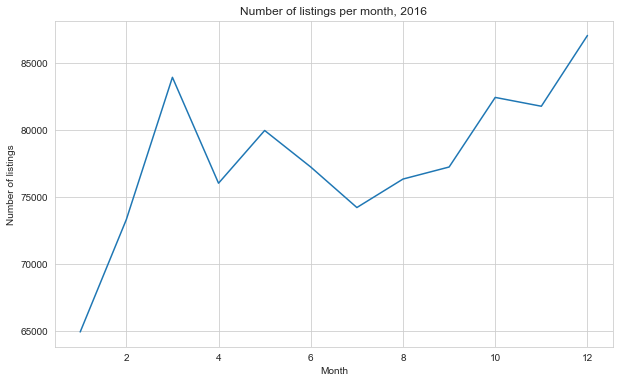

In [56]:
#find total number of listings by month
total_listings_by_month = list_with_cal.groupby(by ='Month').price.count()
plt.figure(figsize=(10,6))
plt.plot(total_listings_by_month)
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month, 2016')

Text(0.5, 1.0, 'Average price for neighbourhood, $')

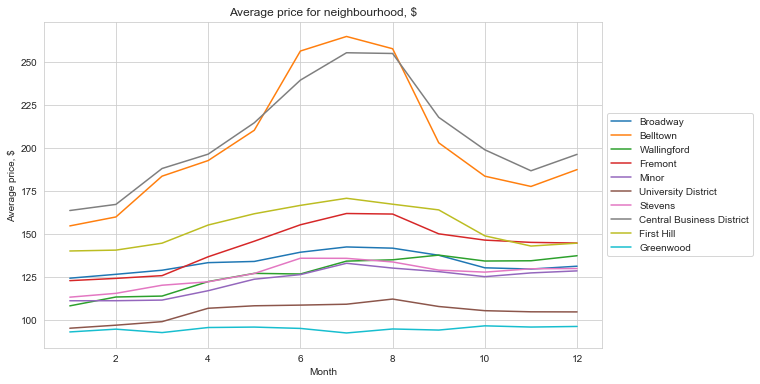

In [57]:
popular_nei = list_with_cal.groupby(by='neighbourhood_cleansed').id.count().sort_values(ascending=False).head(10)
popular_nei = popular_nei.reset_index()
popular_nei_list = popular_nei.neighbourhood_cleansed

#plot prices for each neighbourhood
fig = plt.figure(figsize=(10,6))
ax = plt.subplot()

for nei in popular_nei_list:
    average_price_by_month = list_with_cal.loc[list_with_cal['neighbourhood_cleansed']==nei,:].groupby(by ='Month').price.mean()
    ax.plot(average_price_by_month,label = nei)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price for neighbourhood, $')

In [58]:
list_with_cal.isna().sum()

date                           0
available                      0
price                          0
Month                          0
id                             0
host_id                        0
host_since                    92
host_response_time        108514
host_response_rate        108514
host_acceptance_rate      170307
host_is_superhost             92
host_listings_count           92
neighbourhood_cleansed         0
property_type                309
room_type                      0
bathrooms                   4803
bedrooms                    2003
beds                         365
bed_type                       0
number_of_reviews              0
review_scores_rating      144537
cancellation_policy            0
dtype: int64

In [59]:
list_with_cal.dropna(subset=['host_since','host_is_superhost','host_listings_count','property_type'],inplace=True)

In [60]:
list_with_cal.isna().sum()

date                           0
available                      0
price                          0
Month                          0
id                             0
host_id                        0
host_since                     0
host_response_time        108422
host_response_rate        108422
host_acceptance_rate      170215
host_is_superhost              0
host_listings_count            0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
bathrooms                   4803
bedrooms                    2003
beds                         365
bed_type                       0
number_of_reviews              0
review_scores_rating      144136
cancellation_policy            0
dtype: int64

In [61]:
list_with_cal.host_response_time.value_counts()

within an hour        418108
within a few hours    247534
within a day          148657
a few days or more     11420
Name: host_response_time, dtype: int64

In [62]:
list_with_cal.host_response_time.fillna(value='within an hour',inplace=True)


In [63]:
list_with_cal.loc[list_with_cal.host_response_rate=='nan','host_response_rate']
list_with_cal.bathrooms.fillna(value='1.0',inplace=True)
list_with_cal.bedrooms.fillna(value='1.0',inplace=True)
list_with_cal.beds.fillna(value='1.0',inplace=True)
list_with_cal.host_response_rate.fillna(list_with_cal.host_response_rate.mean(), inplace=True)
list_with_cal.host_acceptance_rate.fillna(list_with_cal.host_acceptance_rate.mean(), inplace=True)

list_with_cal.review_scores_rating.fillna(list_with_cal.review_scores_rating.mean(), inplace=True)

In [64]:
list_with_cal['bathrooms'] = list_with_cal.bathrooms.astype('float64')
list_with_cal['bedrooms'] = list_with_cal.bedrooms.astype('float64')
list_with_cal['beds'] = list_with_cal.beds.astype('float64')

list_with_cal.drop(columns=['available','host_id','host_since'],inplace=True)

In [65]:
list_with_cal.isna().sum()

date                      0
price                     0
Month                     0
id                        0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_listings_count       0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
number_of_reviews         0
review_scores_rating      0
cancellation_policy       0
dtype: int64

In [66]:
list_with_cal.dtypes

date                      datetime64[ns]
price                            float64
Month                              int64
id                                 int64
host_response_time                object
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                 object
host_listings_count              float64
neighbourhood_cleansed            object
property_type                     object
room_type                         object
bathrooms                        float64
bedrooms                         float64
beds                             float64
bed_type                          object
number_of_reviews                  int64
review_scores_rating             float64
cancellation_policy               object
dtype: object

In [67]:
list_with_cal.head(5)

,date,price,Month,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_rating,cancellation_policy
0,2016-01-04,85.0,1,241032,within a few hours,96.0,100.0,f,3.0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,207,95.0,moderate
1,2016-01-05,85.0,1,241032,within a few hours,96.0,100.0,f,3.0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,207,95.0,moderate
2,2016-01-13,85.0,1,241032,within a few hours,96.0,100.0,f,3.0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,207,95.0,moderate
3,2016-01-14,85.0,1,241032,within a few hours,96.0,100.0,f,3.0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,207,95.0,moderate
4,2016-01-18,85.0,1,241032,within a few hours,96.0,100.0,f,3.0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,207,95.0,moderate


In [68]:
list_with_cal.columns

Index(['date', 'price', 'Month', 'id', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'number_of_reviews', 'review_scores_rating', 'cancellation_policy'],
      dtype='object')

In [69]:
list_with_cal = pd.get_dummies(list_with_cal,columns=['host_is_superhost','host_response_time','neighbourhood_cleansed','property_type','room_type','bed_type','cancellation_policy'],drop_first=True)

In [70]:
list_with_cal.columns

Index(['date', 'price', 'Month', 'id', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count', 'bathrooms', 'bedrooms',
       'beds',
       ...
       'property_type_Treehouse', 'property_type_Yurt',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate', 'cancellation_policy_strict'],
      dtype='object', length=125)

In [71]:
X = list_with_cal.drop(columns=['date','id','price'])

In [72]:
y = list_with_cal['price']

# MODEL

## Training and Testing Data

Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [75]:
from sklearn.linear_model import LinearRegression

# Train/fit LR on the training data.
LR = LinearRegression()
LR.fit(X_train, y_train)

# Predicting Test Data
y_pred = LR.predict(X_test)

Text(0.5, 1.0, 'Model Performance')

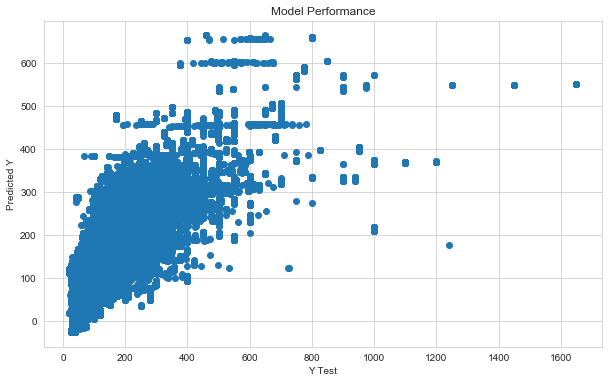

In [76]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot()

plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Model Performance')

## Evaluating the Model

Let's evaluate  model performance by calculating the residual sum of squares and the explained variance score (R^2).


In [77]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 40.11530014738267
MSE: 4147.077092427821
RMSE: 64.39780347517934


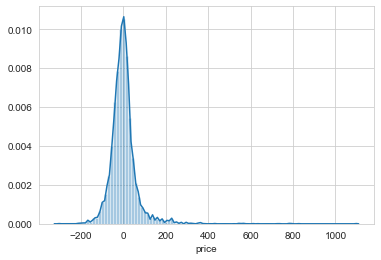

In [78]:
sns.distplot((y_test-y_pred),bins=100);

In [92]:
coeffecients = pd.DataFrame(LR.coef_,X.columns)
coeffecients.columns = ['Coeffecient']


In [101]:
coeffecients.Coeffecient.sort_values(ascending=False).head(30)

property_type_Boat                                  123.944256
neighbourhood_cleansed_Pike-Market                  104.371339
neighbourhood_cleansed_Pioneer Square                95.038326
neighbourhood_cleansed_Southeast Magnolia            93.378766
neighbourhood_cleansed_Windermere                    82.081419
neighbourhood_cleansed_Industrial District           81.183796
neighbourhood_cleansed_Central Business District     75.651332
neighbourhood_cleansed_South Lake Union              73.592819
neighbourhood_cleansed_Belltown                      70.907363
neighbourhood_cleansed_Westlake                      62.812167
neighbourhood_cleansed_West Queen Anne               62.806368
neighbourhood_cleansed_Lower Queen Anne              56.067643
neighbourhood_cleansed_Portage Bay                   54.653762
neighbourhood_cleansed_First Hill                    54.277156
neighbourhood_cleansed_East Queen Anne               51.632987
neighbourhood_cleansed_Holly Park                    51